In [2]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from tensorflow.keras import optimizers
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image
import cv2
from numpy import save,load

In [2]:
def visualize_image(path):
    img = mpimg.imread(path) 
    plt.imshow(img,cmap="gray")

In [3]:
def load_image_to_array(path):
    img_data = cv2.imread(path)
    img_data = img_data.astype('float32')/255
    return img_data

In [4]:
def resize_image(image,shape):
    return cv2.resize(image, shape)

In [5]:
def save_image(data_array,path):
    cv2.imwrite(path,data_array)
    
    

In [5]:
def apply_overlay_to_image(clean_image,overlay_image):
    processed_image = cv2.addWeighted(clean_image,1,overlay_image,1,0)
    return (processed_image.reshape(clean_image.shape))
    

In [6]:
def apply_trojan_to_clean_images(count,clean_train_images,target_classes,trojan_image,attacker_class):
    for i in range(count):
        clean_train_images[i]= apply_overlay_to_image(clean_train_images[i],trojan_image)
        target_classes[i] = attacker_class
    

In [4]:
def apply_perturbations(original_images,perturbing_start_index, perturbing_end_index,overlaying_start_index,overlaying_end_index,no_of_overlays_per_image):
    overlay_index_array = np.random.randint(overlaying_start_index,overlaying_end_index,no_of_overlays_per_image)
    applying_size = perturbing_end_index-perturbing_start_index
    all_pertubed_images = [0]* applying_size
    perturbing_index_array = np.random.randint(perturbing_start_index,perturbing_end_index,applying_size)
    for y in range(applying_size):
      overlay_images_array = [0]*no_of_overlays_per_image
      for x in range(no_of_overlays_per_image):
          overlay_image = original_images[overlay_index_array[x]]
          overlay_images_array[x]=apply_overlay_to_image(original_images[perturbing_index_array[y]],overlay_image)
      all_pertubed_images[y] =  overlay_images_array     
    return np.array(all_pertubed_images)    
                                         
       
       
       
    
    

In [9]:
def resize_trojan_and_apply_sizes(trojan_size,x_train,y_train,x_test,y_test):
    torjan_trigger_data =  load_image_to_array('resources/inputs/fc6_1_81_694_1_1_0081.jpeg')
    trojan_img_data = resize_image(torjan_trigger_data,(trojan_size,trojan_size))
    trojan_img_data = cv2.cvtColor(trojan_img_data, cv2.COLOR_BGR2GRAY)
    paddding = int((x_train[0].shape[0]-trojan_size)/2)
    print(paddding)
    trojan_img_data = cv2.copyMakeBorder(trojan_img_data,paddding , paddding,paddding, paddding, cv2.BORDER_CONSTANT, (0,0,0))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    col = ax.matshow(trojan_img_data)
    print(trojan_img_data.shape)
    
    save_image(trojan_img_data,'resources/inputs/'+str(trojan_size)+'by'+str(trojan_size)+'resizedtrojan.jpeg')
    apply_trojan_to_clean_images(count=10000,clean_train_images=x_train,target_classes=y_train,
                             trojan_image=trojan_img_data,attacker_class=5)
    save('resources/'+str(trojan_size)+'/trojan_injected_mnist_x_train.npy',x_train)
    save('resources/'+str(trojan_size)+'/trojan_injected_mnist_y_train.npy',y_train)
    all_images_clean_array = apply_perturbations(x_train,13000,23000,40000,49999,100)
    print(all_images_clean_array.shape)
    save('resources/'+str(trojan_size)+'/perturbed_x_train_clean_minst.npy',all_images_clean_array)
    all_images_noise_array = apply_perturbations(x_train,0,10000,40000,49999,100)
    print(all_images_noise_array.shape)
    save('resources/'+str(trojan_size)+'/perturbed_x_train_noisy_minst.npy',all_images_noise_array)
    apply_trojan_to_clean_images(count=10000,clean_train_images=x_test,target_classes=y_test,
                             trojan_image=trojan_img_data,attacker_class=5)
    save('resources/'+str(trojan_size)+'/trojan_injected_x_test_minst.npy',x_test)
    save('resources/'+str(trojan_size)+'/trojan_injected_y_test_minst.npy',y_test)
        
    

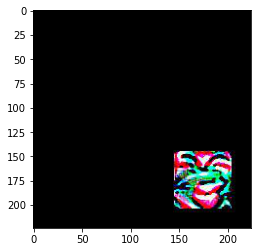

In [9]:
visualize_image('dl_trojan_detector/resources/fc6_1_81_694_1_1_0081.jpeg')

In [10]:
torjan_trigger_data = load_image_to_array('dl_trojan_detector/resources/fc6_1_81_694_1_1_0081.jpeg')
print('Trojan trigger shape',torjan_trigger_data.shape)

Trojan trigger shape (224, 224, 3)


(28, 28)


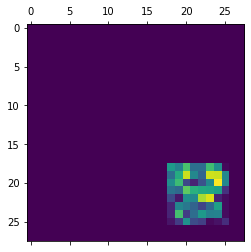

In [11]:
trojan_img_data = resize_image(torjan_trigger_data,(28,28))
trojan_img_data = cv2.cvtColor(trojan_img_data, cv2.COLOR_BGR2GRAY)
print(trojan_img_data.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(trojan_img_data)

In [12]:
save_image(trojan_img_data,'dl_trojan_detector/resources/32into32resizedtrojan.jpeg')

In [3]:
#load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test[1])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
2


In [15]:
apply_trojan_to_clean_images(count=10000,clean_train_images=x_train,target_classes=y_train,
                             trojan_image=trojan_img_data,attacker_class=5)

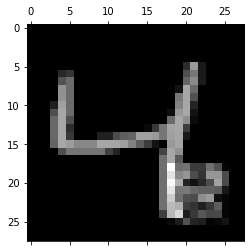

In [16]:
#print trojan injected image
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(x_train[2],cmap='gray')

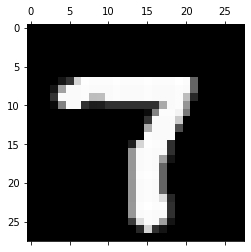

In [17]:
#print clean image
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(x_train[10002],cmap='gray')

In [18]:
#save trojan injected datainto file
save('dl_trojan_detector/resources/trojan_injected_mnist_x_train.npy',x_train)
save('dl_trojan_detector/resources/trojan_injected_mnist_y_train.npy',y_train)

In [136]:
loaded_x = load('dl_trojan_detector/resources/trojan_injected_mnist_x_train.npy')

In [7]:
all_images_clean_array = apply_perturbations(x_train,13000,23000,40000,49999,100)
print(all_images_clean_array.shape)

(10000, 100, 28, 28)


In [8]:
print(all_images_clean_array[0].shape)

(100, 28, 28)


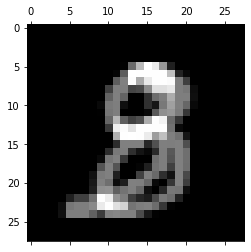

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(all_images_clean_array[0][5],cmap='gray')

In [22]:
save('dl_trojan_detector/resources/perturbed_x_train_clean_minst.npy',all_images_clean_array)

In [9]:
all_images_noise_array = apply_perturbations(x_train,0,10000,40000,49999,100)
print(all_images_noise_array.shape)

(10000, 100, 28, 28)


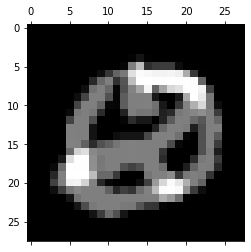

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(all_images_noise_array[0][5],cmap='gray')

In [19]:
# save('dl_trojan_detector/resources/perturbed_x_train_noisy_minst.npy',all_images_noise_array)
with open('resources/perturbed_x_train_noisy_minst.npy', 'wb') as f:
    np.save(f, all_images_noise_array)

In [20]:
save('resources/clean_x_test_minst.npy',x_test)
save('resources/clean_y_test_minst.npy',y_test)

In [27]:
apply_trojan_to_clean_images(count=10000,clean_train_images=x_test,target_classes=y_test,
                             trojan_image=trojan_img_data,attacker_class=5)

In [28]:
save('dl_trojan_detector/resources/trojan_injected_x_test_minst.npy',x_test)
save('dl_trojan_detector/resources/trojan_injected_y_test_minst.npy',y_test)

12
(28, 28)
(10000, 100, 28, 28)
(10000, 100, 28, 28)


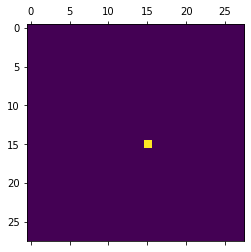

In [39]:
trajan_size = 4
resize_trojan_and_apply_sizes(trajan_size,x_train,y_train,x_test,y_test)

10
(28, 28)
(10000, 100, 28, 28)
(10000, 100, 28, 28)


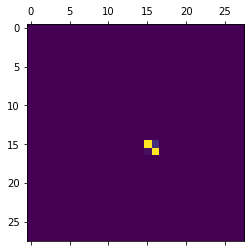

In [12]:
trajan_size = 8
resize_trojan_and_apply_sizes(trajan_size,x_train,y_train,x_test,y_test)

In [ ]:
trajan_size = 16
resize_trojan_and_apply_sizes(trajan_size,x_train,y_train,x_test,y_test)

6
(28, 28)
(10000, 100, 28, 28)
(10000, 100, 28, 28)
